In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import pickle
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## MAKE MODEL FOR FUEL CONSUMPTION PREDICTION

In [84]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')

In [85]:
df.dropna(inplace=True)
df.drop(['car name'],axis=1,inplace=True)
df.drop(['type'],axis=1,inplace=True)

In [86]:
x = df.drop('kml',axis=1)
Y = df['kml']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=101)

In [87]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [88]:
pickle.dump(sc, open(r'models/consumption-scaler.pkl', 'wb'))

In [89]:
consumptionModel = Sequential()

consumptionModel.add(Dense(units = 64,activation='relu',input_shape=[len(x_train.keys())]))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units = 64,activation='relu'))
consumptionModel.add(Dense(units=1))

consumptionModel.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [90]:
model_history=consumptionModel.fit(x_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 177.1069 - mean_absolute_error: 12.9843 - mean_squared_error: 177.1069
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 172.0385 - mean_absolute_error: 12.7798 - mean_squared_error: 172.0385
Epoch 3/1000
2/2 [==============================] - 0s 5ms/step - loss: 167.0420 - mean_absolute_error: 12.5703 - mean_squared_error: 167.0420
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 161.5971 - mean_absolute_error: 12.3451 - mean_squared_error: 161.5971
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 155.7119 - mean_absolute_error: 12.0888 - mean_squared_error: 155.7119
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 148.9859 - mean_absolute_error: 11.7943 - mean_squared_error: 148.9859
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 141.6900 - mean_absolute_error: 11.4741 - mean_squared_error: 141.6900

2/2 [==============================] - 0s 3ms/step - loss: 5.4391 - mean_absolute_error: 1.5976 - mean_squared_error: 5.4391
Epoch 118/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.3498 - mean_absolute_error: 1.5782 - mean_squared_error: 5.3498
Epoch 119/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2939 - mean_absolute_error: 1.5663 - mean_squared_error: 5.2939
Epoch 120/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2550 - mean_absolute_error: 1.5601 - mean_squared_error: 5.2550
Epoch 121/1000
2/2 [==============================] - 0s 8ms/step - loss: 5.2197 - mean_absolute_error: 1.5532 - mean_squared_error: 5.2197
Epoch 122/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.1912 - mean_absolute_error: 1.5528 - mean_squared_error: 5.1912
Epoch 123/1000
2/2 [==============================] - 0s 6ms/step - loss: 5.2364 - mean_absolute_error: 1.5694 - mean_squared_error: 5.2364
Epoch 124/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 4.1613 - mean_absolute_error: 1.3468 - mean_squared_error: 4.1613
Epoch 234/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1522 - mean_absolute_error: 1.3552 - mean_squared_error: 4.1522
Epoch 235/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1708 - mean_absolute_error: 1.3729 - mean_squared_error: 4.1708
Epoch 236/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.1520 - mean_absolute_error: 1.3558 - mean_squared_error: 4.1520
Epoch 237/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.2069 - mean_absolute_error: 1.3501 - mean_squared_error: 4.2069
Epoch 238/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3185 - mean_absolute_error: 1.3586 - mean_squared_error: 4.3185
Epoch 239/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.3270 - mean_absolute_error: 1.3614 - mean_squared_error: 4.3270
Epoch 240/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.9963 - mean_absolute_error: 1.3590 - mean_squared_error: 3.9963
Epoch 350/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.0515 - mean_absolute_error: 1.3710 - mean_squared_error: 4.0515
Epoch 351/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9024 - mean_absolute_error: 1.3408 - mean_squared_error: 3.9024
Epoch 352/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8545 - mean_absolute_error: 1.3394 - mean_squared_error: 3.8545
Epoch 353/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8648 - mean_absolute_error: 1.3642 - mean_squared_error: 3.8648
Epoch 354/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8587 - mean_absolute_error: 1.3525 - mean_squared_error: 3.8587
Epoch 355/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8488 - mean_absolute_error: 1.3556 - mean_squared_error: 3.8488
Epoch 356/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.4818 - mean_absolute_error: 1.2134 - mean_squared_error: 3.4818
Epoch 466/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.3976 - mean_absolute_error: 1.1958 - mean_squared_error: 3.3976
Epoch 467/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.3900 - mean_absolute_error: 1.2012 - mean_squared_error: 3.3900
Epoch 468/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.4872 - mean_absolute_error: 1.2328 - mean_squared_error: 3.4872
Epoch 469/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.4729 - mean_absolute_error: 1.2541 - mean_squared_error: 3.4729
Epoch 470/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.3369 - mean_absolute_error: 1.2098 - mean_squared_error: 3.3369
Epoch 471/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.2998 - mean_absolute_error: 1.1886 - mean_squared_error: 3.2998
Epoch 472/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 2.7942 - mean_absolute_error: 1.1770 - mean_squared_error: 2.7942
Epoch 582/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8638 - mean_absolute_error: 1.2149 - mean_squared_error: 2.8638
Epoch 583/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8797 - mean_absolute_error: 1.2195 - mean_squared_error: 2.8797
Epoch 584/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.8197 - mean_absolute_error: 1.1897 - mean_squared_error: 2.8197
Epoch 585/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8026 - mean_absolute_error: 1.1666 - mean_squared_error: 2.8026
Epoch 586/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.7364 - mean_absolute_error: 1.1344 - mean_squared_error: 2.7364
Epoch 587/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8635 - mean_absolute_error: 1.1721 - mean_squared_error: 2.8635
Epoch 588/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 2.4203 - mean_absolute_error: 1.0708 - mean_squared_error: 2.4203
Epoch 698/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4348 - mean_absolute_error: 1.0939 - mean_squared_error: 2.4348
Epoch 699/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4287 - mean_absolute_error: 1.0965 - mean_squared_error: 2.4287
Epoch 700/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.3394 - mean_absolute_error: 1.0671 - mean_squared_error: 2.3394
Epoch 701/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4702 - mean_absolute_error: 1.1008 - mean_squared_error: 2.4702
Epoch 702/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.5323 - mean_absolute_error: 1.0978 - mean_squared_error: 2.5323
Epoch 703/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4882 - mean_absolute_error: 1.0782 - mean_squared_error: 2.4882
Epoch 704/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.9087 - mean_absolute_error: 0.9738 - mean_squared_error: 1.9087
Epoch 814/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9233 - mean_absolute_error: 0.9800 - mean_squared_error: 1.9233
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9447 - mean_absolute_error: 0.9831 - mean_squared_error: 1.9447
Epoch 816/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9659 - mean_absolute_error: 0.9879 - mean_squared_error: 1.9659
Epoch 817/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.0279 - mean_absolute_error: 1.0162 - mean_squared_error: 2.0279
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1773 - mean_absolute_error: 1.0695 - mean_squared_error: 2.1773
Epoch 819/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.3113 - mean_absolute_error: 1.0864 - mean_squared_error: 2.3113
Epoch 820/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.7527 - mean_absolute_error: 0.8901 - mean_squared_error: 1.7527
Epoch 930/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7381 - mean_absolute_error: 0.8800 - mean_squared_error: 1.7381
Epoch 931/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.7485 - mean_absolute_error: 0.8991 - mean_squared_error: 1.7485
Epoch 932/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7186 - mean_absolute_error: 0.9017 - mean_squared_error: 1.7186
Epoch 933/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7134 - mean_absolute_error: 0.9112 - mean_squared_error: 1.7134
Epoch 934/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7162 - mean_absolute_error: 0.9267 - mean_squared_error: 1.7162
Epoch 935/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7924 - mean_absolute_error: 0.9613 - mean_squared_error: 1.7924
Epoch 936/1000
2/2 [===============

1/1 [==============================] - 0s 57ms/step


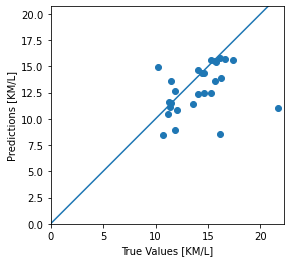

In [91]:
prediction = consumptionModel.predict(x_test_std)
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [KM/L]')
plt.ylabel('Predictions [KM/L]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [92]:
consumptionModel.save(r'models/consumption-model.h5')

## MAKE MODEL FOR CAR TYPE

In [2]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')
df.head()

,car name,cylinders,displacement,horsepower,weight,model year,type,kml
0,Hyundai Stargazer,4,1497,113.4,1191.0,22,1,12.04
1,Toyota Avanza Veloz 1.3 MT,4,1329,95.0,1045.0,22,1,14.60
2,mitsubishi Xpander,4,1499,104.0,1780.0,20,1,11.80
3,toyoya raize 1.0L Turbo,3,998,97.0,1255.0,21,2,11.50
4,toyota gr yaris,3,1618,257.0,1280.0,20,3,10.00


In [3]:
df.dtypes

car name         object
cylinders         int64
displacement      int64
horsepower      float64
weight          float64
model year        int64
type              int64
kml             float64
dtype: object

In [4]:
df.dropna(inplace=True)
df.drop(['car name'],axis=1,inplace=True)

In [14]:
X = df.drop('type',axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
typeModel = DecisionTreeClassifier()
typeModel.fit(X_train, y_train)

DecisionTreeClassifier()

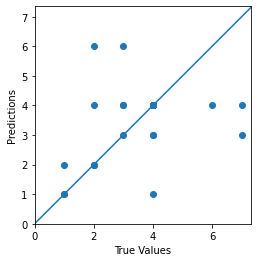

In [16]:
prediction = typeModel.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [21]:
with open('models/type-model.pkl', 'wb') as file:
    pickle.dump(typeModel, file)